In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("./archive/netflix_titles.csv")
print(df1.info())
print(df1.head())

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
 12  Unnamed: 12   1 non-null      object
dtypes: int64(2), object(11)
memory usage: 633.3+ KB
None
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes

In [4]:
df2=df1[df1["type"]=="TV Show"]
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 12
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",NaN
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,NaN
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,NaN
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",NaN
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,3,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN


In [5]:
print(df2["rating"].unique())
count=1
for item in df2["rating"].unique():
    df2["rating"].replace(to_replace=item,value=count,inplace=True)
    count+=1

[&#39;TV-Y7-FV&#39; &#39;TV-Y7&#39; &#39;TV-MA&#39; &#39;3&#39; &#39;TV-PG&#39; &#39;TV-Y&#39; &#39;TV-G&#39; &#39;NR&#39; &#39;G&#39; &#39;R&#39; &#39;PG&#39;]


In [6]:
movie_rec=df2.drop(["show_id","type","title","director","cast","country","date_added","duration","description","Unnamed: 12"],axis=1)
print(df2["rating"].unique())
movie_rec.info()
movie_rec["rating"].unique()

[ 1  2  3  4  5  6  7  8  9 10 11]
&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 1969 entries, 2 to 6233
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  1969 non-null   int64 
 1   rating        1969 non-null   int64 
 2   listed_in     1969 non-null   object
dtypes: int64(2), object(1)
memory usage: 61.5+ KB


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
movie_rec["listed_in"]=le.fit_transform(movie_rec["listed_in"])
print(movie_rec.head())

    release_year  rating  listed_in
2           2013       1        141
3           2016       2        141
5           2016       3         60
8           2017       3         94
26          2015       4        115


In [8]:
print(movie_rec.corr())
print(movie_rec.describe())

              release_year    rating  listed_in
release_year      1.000000 -0.109969   0.053804
rating           -0.109969  1.000000  -0.000657
listed_in         0.053804 -0.000657   1.000000
       release_year       rating    listed_in
count   1969.000000  1969.000000  1969.000000
mean    2015.536313     3.840528   104.245302
std        5.799568     1.303124    54.033472
min     1925.000000     1.000000     0.000000
25%     2015.000000     3.000000    63.000000
50%     2017.000000     4.000000   115.000000
75%     2018.000000     4.000000   141.000000
max     2020.000000    11.000000   211.000000


### Model Creation

Text(0, 0.5, &#39;Genre&#39;)

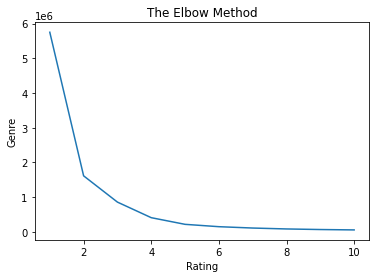

In [9]:
x = np.array(movie_rec.iloc[:,1:])
from sklearn.cluster import KMeans 
wcss = [] 
for i in range(1, 11): 
    kms = KMeans(n_clusters=i, random_state=42) 
    kms.fit(x) 
    wcss.append(kms.inertia_) 
plt.plot(range(1, 11), wcss) 
plt.title("The Elbow Method") 
plt.xlabel("Rating") 
plt.ylabel("Genre")

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,random_state=42)
ypred = km.fit_predict(x)
ypred

array([1, 1, 2, ..., 3, 0, 2], dtype=int32)

&lt;matplotlib.legend.Legend at 0x7fc4dd3c2880&gt;

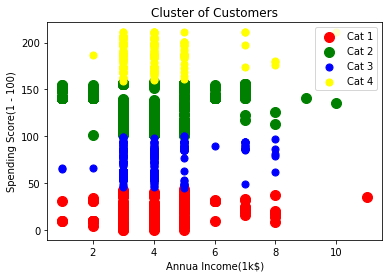

In [11]:
plt.scatter(x[ypred == 0, 0], x[ypred == 0, 1], s=100, c="red", label="Cat 1") 
plt.scatter(x[ypred == 1, 0], x[ypred == 1, 1], s=100, c="green", label="Cat 2") 
plt.scatter(x[ypred == 2, 0], x[ypred == 2, 1], s=50, c="blue", label="Cat 3") 
plt.scatter(x[ypred == 3, 0], x[ypred == 3, 1], s=50, c="yellow", label="Cat 4") 
plt.title("Cluster of Customers") 
plt.xlabel("Annua Income(1k$)") 
plt.ylabel("Spending Score(1 - 100)") 
plt.legend() 

In [12]:
def predict(name):
    lst=[]
    for item in df2["title"]:
        if name==str(item):
            value = df2[df2["title"]==name]
            break

    test_data=value.drop(["show_id","type","title","director","cast","country","date_added","duration","description","Unnamed: 12"],axis=1)
    test_data["listed_in"]=le.transform(test_data["listed_in"])
    print(test_data)        
    x = np.array(test_data.iloc[:,1:])            
    pred=kms.predict(x)        
    test_data["listed_in"]=le.inverse_transform(pred)
    print(test_data,test_data["listed_in"])
    result_genre=list(np.array(test_data.iloc[:,2]))
    print(type(result_genre),result_genre)
    return result_genre

In [14]:
rg=predict("Maron")

      release_year  rating  listed_in
6230          2016       3        187
      release_year  rating                                   listed_in
6230          2016       3  Anime Series, Crime TV Shows, TV Thrillers 6230    Anime Series, Crime TV Shows, TV Thrillers
Name: listed_in, dtype: object
&lt;class &#39;list&#39;&gt; [&#39;Anime Series, Crime TV Shows, TV Thrillers&#39;]


In [15]:
resultant_df=df1[df1["listed_in"]==rg[0]]
print(resultant_df["title"])

3223    Case Closed
Name: title, dtype: object
